In [133]:
import tensorflow.keras as keras
import pandas as pd
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sign_mnist_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sign_mnist_valid.csv")

In [134]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [135]:
train_df.shape

(27455, 785)

In [136]:
test_df.shape

(7172, 785)

In [137]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [138]:
y_train.shape

(27455,)

In [139]:
y_test.shape

(7172,)

In [140]:
x_train = train_df.values
x_test = test_df.values

In [141]:
x_train.shape

(27455, 784)

In [142]:
x_test.shape

(7172, 784)

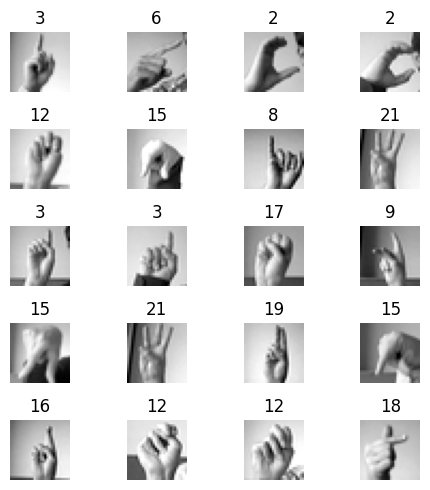

In [143]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
for i in range(20):
  plt.subplot(5,4,i+1)
  row=x_train[i]
  label=y_train[i]
  image=row.reshape(28,28)
  plt.imshow(row.reshape(28,28))
  plt.title(label)
  plt.axis('off')
  plt.imshow(image,cmap='gray')
plt.tight_layout()
plt.show()

In [144]:
x_train[0]

array([107, 118, 127, 134, 139, 143, 146, 150, 153, 156, 158, 160, 163,
       165, 159, 166, 168, 170, 170, 171, 171, 171, 172, 171, 171, 170,
       170, 169, 111, 121, 129, 135, 141, 144, 148, 151, 154, 157, 160,
       163, 164, 170, 119, 152, 171, 171, 170, 171, 172, 172, 172, 172,
       172, 171, 171, 170, 113, 123, 131, 137, 142, 145, 150, 152, 155,
       158, 161, 163, 164, 172, 105, 142, 170, 171, 171, 171, 172, 172,
       173, 173, 172, 171, 171, 171, 116, 125, 133, 139, 143, 146, 151,
       153, 156, 159, 162, 163, 167, 167,  95, 144, 171, 172, 172, 172,
       172, 172, 173, 173, 173, 172, 172, 171, 117, 126, 134, 140, 145,
       149, 153, 156, 158, 161, 163, 164, 175, 156,  87, 154, 172, 173,
       173, 173, 173, 173, 174, 174, 174, 173, 172, 172, 119, 128, 136,
       142, 146, 150, 153, 156, 159, 163, 165, 164, 184, 148,  89, 164,
       172, 174, 174, 174, 174, 175, 175, 174, 175, 174, 173, 173, 122,
       130, 138, 143, 147, 150, 154, 158, 162, 165, 166, 172, 18

In [145]:
x_train.min()

np.int64(0)

In [146]:
x_train.max()

np.int64(255)

In [147]:
x_train = x_train/255
x_test = x_test/255

In [148]:
print(x_train.min())
print(x_train.max())

0.0
1.0


In [149]:
y_train.min()

0

In [150]:
y_train.max()

23

In [151]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,24)
y_test = to_categorical(y_test,24)

In [152]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [153]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(24,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [154]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 24)             │        12,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 676,888 (2.58 MB)

 Trainable params: 676,888 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

In [155]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [156]:
history = model.fit(x_train,y_train,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.2408 - loss: 2.5113 - val_accuracy: 0.4929 - val_loss: 1.5010
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.6321 - loss: 1.0981 - val_accuracy: 0.5973 - val_loss: 1.2715
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7839 - loss: 0.6436 - val_accuracy: 0.7340 - val_loss: 0.7957
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8553 - loss: 0.4256 - val_accuracy: 0.7338 - val_loss: 0.9023
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9025 - loss: 0.3012 - val_accuracy: 0.8257 - val_loss: 0.6391
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9288 - loss: 0.2339 - val_accuracy: 0.7589 - val_loss: 1.1238
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9489 - loss: 0.1869 - val_accuracy: 0.6786 - val_loss: 1.6720
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9534 - loss: 0.1868 - val

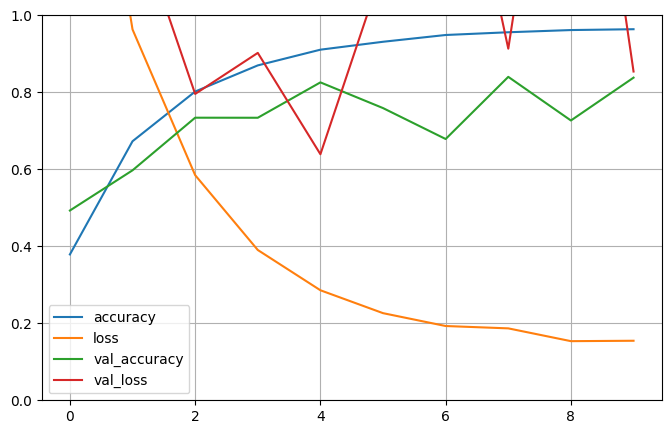

In [157]:
import pandas as pd
df = pd.DataFrame(history.history)
df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [158]:
df

,accuracy,loss,val_accuracy,val_loss
0,0.378802,1.961841,0.492889,1.500999
1,0.672810,0.963212,0.597323,1.271464
2,0.801930,0.584746,0.733965,0.795677
3,0.869823,0.390356,0.733826,0.902308
4,0.910654,0.285745,0.825711,0.639074
5,0.931197,0.226283,0.758924,1.123802
6,0.948789,0.192883,0.678611,1.671953
7,0.955891,0.186777,0.840073,0.913215
8,0.961610,0.153554,0.726715,1.973068
9,0.963795,0.154601,0.837981,0.853913


In [159]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [160]:
history = model.fit(x_train,y_train,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9784 - loss: 0.0690 - val_accuracy: 0.8561 - val_loss: 0.8740
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 1.0000 - loss: 5.2975e-04 - val_accuracy: 0.8550 - val_loss: 0.9021
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 1.0000 - loss: 2.1404e-04 - val_accuracy: 0.8542 - val_loss: 0.8947
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 1.0000 - loss: 1.3281e-04 - val_accuracy: 0.8476 - val_loss: 0.9704
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9864 - loss: 0.0645 - val_accuracy: 0.8250 - val_loss: 0.7914
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9895 - loss: 0.0407 - val_accuracy: 0.8204 - val_loss: 0.8547
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9999 - loss: 0.0039 - val_accuracy: 0.8516 - val_loss: 0.7781
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 1.0000 - loss

In [161]:
import pandas as pd
df1 = pd.DataFrame(history.history)
df1

,accuracy,loss,val_accuracy,val_loss
0,0.987762,0.039487,0.856107,0.874003
1,1.000000,0.000432,0.854992,0.902111
2,1.000000,0.000196,0.854155,0.894682
3,1.000000,0.000123,0.847602,0.970363
4,0.967401,0.146103,0.825014,0.791449
5,0.980623,0.059798,0.820413,0.854717
6,0.999964,0.002280,0.851645,0.778139
7,1.000000,0.000825,0.852621,0.783803
8,1.000000,0.000559,0.842443,0.825691
9,0.983937,0.058781,0.662158,1.461045


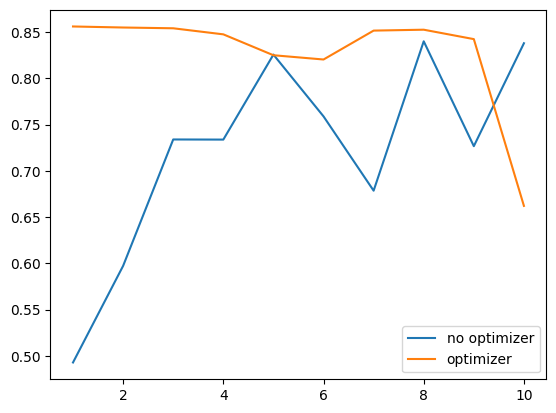

In [162]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),df.val_accuracy,label ="no optimizer")
plt.plot(range(1,11),df1.val_accuracy,label ="optimizer")
plt.legend()
plt.show()